# 1. Single Linear Regression - Video Game Sales
## (Using one feature to predict a continuous numerical target)
## https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales

In [1]:
#Import Statments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
# Loading video game sales data
df_VideoGame = pd.read_csv('video_games_sales.csv')

# Visualizing the dataframe
df_VideoGame

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Let's see if we can use a subset of this data to predict the target variable: global_sales

In [3]:
# Exctracting Features from the original df_VideoGame Dataset
df_VideoGameFeatureSubset = df_VideoGame[['platform', 'year', 'genre', 'publisher','na_sales', 'global_sales']]

# Dropping null values from the dataset
df_VideoGameFeatureSubset.dropna(inplace=True)
df_VideoGameFeatureSubset.isnull().sum()

C:\Users\gahhh\AppData\Local\Temp\ipykernel_129576\2330514909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset.dropna(inplace=True)


platform        0
year            0
genre           0
publisher       0
na_sales        0
global_sales    0
dtype: int64

### Recommendation
- On line 5, df_VideoGameFeatureSubset.dropna(inplace=True) is being assigned on line 2 df_VideoGame[['platform', 'year', 'genre', 'publisher','na_sales', 'global_sales']] this COULD possibly cause an issue in the future. Suggestion: assign on line 2 df_VideoGame[['platform', 'year', 'genre', 'publisher','na_sales', 'global_sales']].copy() to make sure its a new dataframe and it doesn't change the original dataframe. Then you can go crazy. 

In [4]:
# Initialize the labelencoder object
le_videogame = LabelEncoder()

# Save the unencoded feature platform (In case you want to decode later)
df_VideoGame_decoded_platform = df_VideoGameFeatureSubset['platform']

# Override the original platform feature with the label encoded feature
df_VideoGameFeatureSubset['platform'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['platform'])

# Print out the decoded series, platform
df_VideoGame_decoded_platform

C:\Users\gahhh\AppData\Local\Temp\ipykernel_129576\3575130277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['platform'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['platform'])


0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: platform, Length: 16291, dtype: object

In [5]:
df_VideoGameFeatureSubset['platform']

0        26
1        11
2        26
3        26
4         5
         ..
16593     6
16594     7
16595    16
16596     4
16597     6
Name: platform, Length: 16291, dtype: int64

In [6]:
# Save the unencoded feature genre (In case you want to decode later)
df_VideoGame_decoded_genre = df_VideoGameFeatureSubset['genre']

# Override the original genre feature with the label encoded feature
df_VideoGameFeatureSubset['genre'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['genre'])

# Print out the decoded series, genre
df_VideoGame_decoded_genre

C:\Users\gahhh\AppData\Local\Temp\ipykernel_129576\3503678093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['genre'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['genre'])


0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16593        Platform
16594         Shooter
16595          Racing
16596          Puzzle
16597        Platform
Name: genre, Length: 16291, dtype: object

In [7]:
df_VideoGameFeatureSubset['genre']

0        10
1         4
2         6
3        10
4         7
         ..
16593     4
16594     8
16595     6
16596     5
16597     4
Name: genre, Length: 16291, dtype: int64

In [8]:
# Save the unencoded feature publisher (In case you want to decode later)
df_VideoGame_decoded_publisher = df_VideoGameFeatureSubset['publisher']

# Override the original publisher feature with the label encoded feature
df_VideoGameFeatureSubset['publisher'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['publisher'])

# Print out the decoded series, publisher
df_VideoGame_decoded_publisher

C:\Users\gahhh\AppData\Local\Temp\ipykernel_129576\109776527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset['publisher'] = le_videogame.fit_transform(df_VideoGameFeatureSubset['publisher'])


0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: publisher, Length: 16291, dtype: object

In [9]:
df_VideoGameFeatureSubset['publisher']

0        359
1        359
2        359
3        359
4        359
        ... 
16593    269
16594    241
16595     21
16596      8
16597    544
Name: publisher, Length: 16291, dtype: int64

In [10]:
# Feel free to uncomment the chart below, may take a little while to output though
#sns.pairplot(df_VideoGameFeatureSubset.drop('global_sales', axis=1), kind='kde')

In [11]:
# View the labelencoded dataframe
df_VideoGameFeatureSubset

,platform,year,genre,publisher,na_sales,global_sales
0,26,2006.0,10,359,41.49,82.74
1,11,1985.0,4,359,29.08,40.24
2,26,2008.0,6,359,15.85,35.82
3,26,2009.0,10,359,15.75,33.00
4,5,1996.0,7,359,11.27,31.37
...,...,...,...,...,...,...
16593,6,2002.0,4,269,0.01,0.01
16594,7,2003.0,8,241,0.01,0.01
16595,16,2008.0,6,21,0.00,0.01
16596,4,2010.0,5,8,0.00,0.01


In [12]:
# Normailze platform, year, genre, and publisher
mm_scaler = MinMaxScaler(feature_range=(-1, 1))

df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']] = mm_scaler.fit_transform(df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']])
df_VideoGameFeatureSubset

C:\Users\gahhh\AppData\Local\Temp\ipykernel_129576\2534807158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']] = mm_scaler.fit_transform(df_VideoGameFeatureSubset[['platform', 'year', 'genre', 'publisher']])


,platform,year,genre,publisher,na_sales,global_sales
0,0.733333,0.30,0.818182,0.248696,41.49,82.74
1,-0.266667,-0.75,-0.272727,0.248696,29.08,40.24
2,0.733333,0.40,0.090909,0.248696,15.85,35.82
3,0.733333,0.45,0.818182,0.248696,15.75,33.00
4,-0.666667,-0.20,0.272727,0.248696,11.27,31.37
...,...,...,...,...,...,...
16593,-0.600000,0.10,-0.272727,-0.064348,0.01,0.01
16594,-0.533333,0.15,0.454545,-0.161739,0.01,0.01
16595,0.066667,0.40,0.090909,-0.926957,0.00,0.01
16596,-0.733333,0.50,-0.090909,-0.972174,0.00,0.01


In [13]:
# Create a pairplot for the normalized data, columns_to_manipulate, use kde for the kind
# sns.pairplot(df_VideoGameFeatureSubset, kind='kde')

### Recommendation
- Your na_sales and global_sales break your pairplot using kde because they were never scaled. These should be non-negative continuos features. Try to log1p them from being so right-side skewed and then you can min max scale with everything not just a subset of your subset which you're using later

In [14]:
print(df_VideoGameFeatureSubset.nunique())
df_VideoGameFeatureSubset.describe()


platform         31
year             39
genre            12
publisher       576
na_sales        408
global_sales    621
dtype: int64


,platform,year,genre,publisher,na_sales,global_sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.054189,0.320278,-0.103889,0.015594,0.265647,0.540910
std,0.558000,0.291621,0.684153,0.614407,0.822432,1.567345
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.010000
25%,-0.533333,0.150000,-0.818182,-0.523478,0.000000,0.060000
50%,0.066667,0.350000,-0.090909,0.123478,0.080000,0.170000
75%,0.400000,0.500000,0.454545,0.582609,0.240000,0.480000
max,1.000000,1.000000,1.000000,1.000000,41.490000,82.740000


In [ ]:
# Save Checkpoint
df_VideoGameFeatureSubset.to_csv('Game_Data_Cleaned.csv', index=False)

In [ ]:
# Load the cleaned video game sales data into a dataframe
df_VideoGameCleaned = pd.read_csv('Game_Data_Cleaned.csv')

# Remove the column named 'Unnamed: 0'
df_VideoGameCleaned.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# print out the dataframe
df_VideoGameCleaned

,platform,year,genre,publisher,na_sales,global_sales
0,0.733333,0.30,0.818182,0.248696,41.49,82.74
1,-0.266667,-0.75,-0.272727,0.248696,29.08,40.24
2,0.733333,0.40,0.090909,0.248696,15.85,35.82
3,0.733333,0.45,0.818182,0.248696,15.75,33.00
4,-0.666667,-0.20,0.272727,0.248696,11.27,31.37
...,...,...,...,...,...,...
16286,-0.600000,0.10,-0.272727,-0.064348,0.01,0.01
16287,-0.533333,0.15,0.454545,-0.161739,0.01,0.01
16288,0.066667,0.40,0.090909,-0.926957,0.00,0.01
16289,-0.733333,0.50,-0.090909,-0.972174,0.00,0.01


### Recommendation
- When using the function to_csv use the index=False parameter to ignore the index of your dataframe. This causes the "Unnamed: 0" column in your csv. Then you wont have to drop it or worry about that unwanted column. 

In [73]:
df_VideoGameCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   platform      16291 non-null  float64
 1   year          16291 non-null  float64
 2   genre         16291 non-null  float64
 3   publisher     16291 non-null  float64
 4   na_sales      16291 non-null  float64
 5   global_sales  16291 non-null  float64
dtypes: float64(6)
memory usage: 763.8 KB


In [78]:
# use the pandas dataframe function called .corr() to quickly check which features most closely 'relate' to the target variable, higher is better
numerical_features = df_VideoGameCleaned.select_dtypes(include=['float64']).columns.to_list()

corr = df_VideoGameCleaned[[
    *numerical_features
]].corr(method='spearman')
corr

,platform,year,genre,publisher,na_sales,global_sales
platform,1.000000,0.199706,0.002440,-0.010614,0.091666,0.073539
year,0.199706,1.000000,-0.151521,0.026242,-0.131870,-0.150203
genre,0.002440,-0.151521,1.000000,-0.045759,0.015242,0.047522
publisher,-0.010614,0.026242,-0.045759,1.000000,0.001184,0.031861
na_sales,0.091666,-0.131870,0.015242,0.001184,1.000000,0.794906
global_sales,0.073539,-0.150203,0.047522,0.031861,0.794906,1.000000


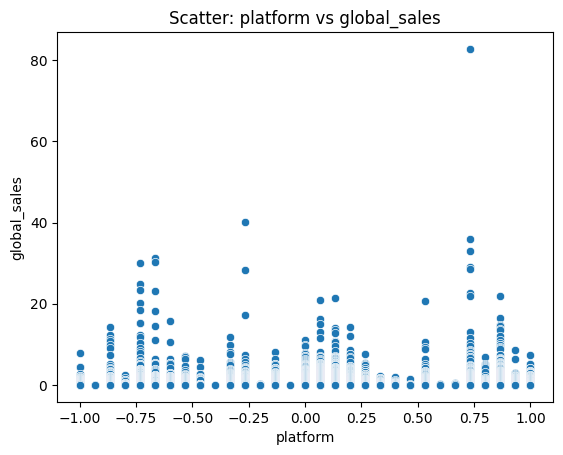

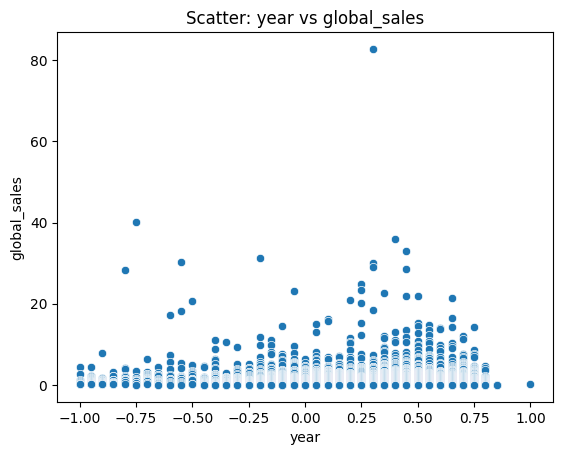

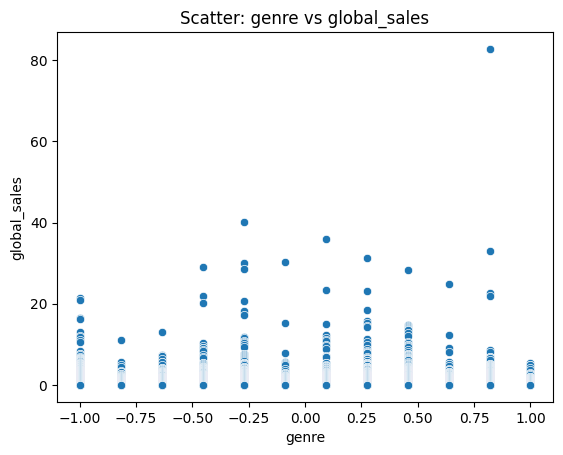

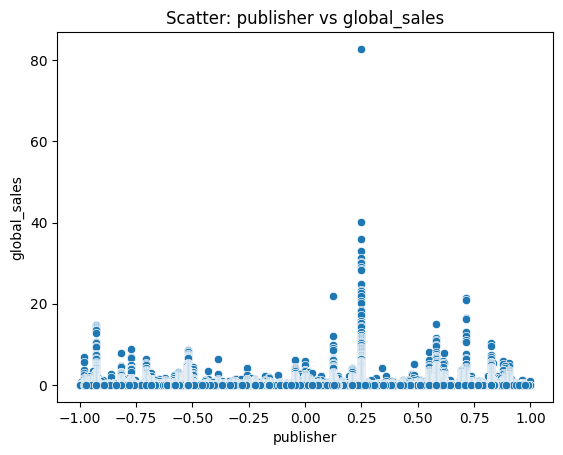

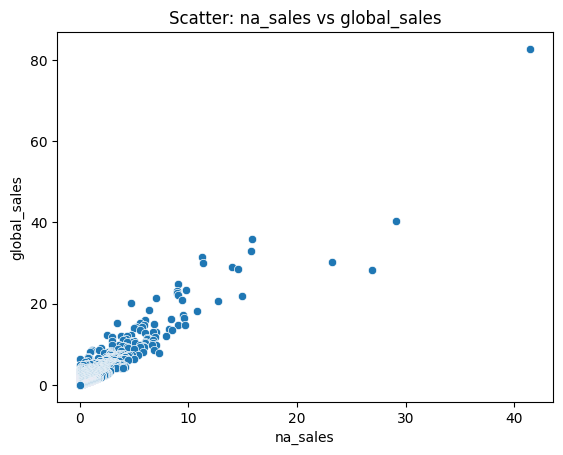

In [ ]:
# create a 2D scatter plot to 'eyeball' the relationship between your chosen feature and global_sales
try:
    numerical_features.remove('global_sales')
except ValueError:
    print('Feature already removed')

for feature in numerical_features:
    sns.scatterplot(data=df_VideoGameCleaned, x=f'{feature}', y='global_sales')
    plt.title(f'Scatter: {feature} vs global_sales')
    plt.show()

In [ ]:
# Seperate the Features and the Target
# Print the target dataframe
Y = df_VideoGameCleaned.global_sales
Y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16286     0.01
16287     0.01
16288     0.01
16289     0.01
16290     0.01
Name: global_sales, Length: 16291, dtype: float64

In [ ]:
# Print the feature dataframe
X = df_VideoGameCleaned.drop('global_sales', axis=1)
X

,platform,year,genre,publisher,na_sales
0,0.733333,0.30,0.818182,0.248696,41.49
1,-0.266667,-0.75,-0.272727,0.248696,29.08
2,0.733333,0.40,0.090909,0.248696,15.85
3,0.733333,0.45,0.818182,0.248696,15.75
4,-0.666667,-0.20,0.272727,0.248696,11.27
...,...,...,...,...,...
16286,-0.600000,0.10,-0.272727,-0.064348,0.01
16287,-0.533333,0.15,0.454545,-0.161739,0.01
16288,0.066667,0.40,0.090909,-0.926957,0.00
16289,-0.733333,0.50,-0.090909,-0.972174,0.00


In [83]:
# use train_test_split to get your dataset ready for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=82, shuffle=True)

# print out the shape of the trainig and testing, feature and targets
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', Y_train.shape)
print('Shape of y_test: ', Y_test.shape)

Shape of X_train:  (13032, 5)
Shape of X_test:  (3259, 5)
Shape of y_train:  (13032,)
Shape of y_test:  (3259,)


In [1]:
# Import the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Initalize the LinearRegression object
model = LinearRegression()

#!!! Important !!!
# Fit your Linear Regressor on only ** one ** of the features in your X's, 
# HINT: If you have multiple features in your X_train, select your chosen feature for singular linear regression and make a new dataframe
feature = 'platform'
df_to_fit = pd.DataFrame(data=X_train[feature], columns=[feature]) 
model.fit(df_to_fit, Y_train)

# Get your predictions from your fitted model
y_pred = model.predict(X_test[[feature]])

# use the model's class function .score to calculate the r^2 value
# linear_score = model.score(y_pred, Y_test)

# print out the r2 vaule for the linear regressor
# print(f'Linear Regression R2 score: {linear_score}')

KeyboardInterrupt: 

In [ ]:
# Coefficients and intercept (y = wx + b), where w is the weight, or coefficent of x, and b is the y-intercept
# print(f'Coefficients: {lr.coef_}')
# print(f'Intercept: {lr.intercept_}')

In [25]:
# Use a scatter plot to show how the line passes through the dataset
# You can optionally spilt the train and test set by color, and plot the line by passing X_test, and y_pred


### Linear Regression Questions: 

1. What was the final r^2 value of your model? 
2.  What does this tell us? 

- [Your Answer Here]

3. Can we get more performance from this model? 
4. If so, how? If not, why?
- [Your Answer Here]

5. Would it be beneficial to perform multiple linear regresssion? I.e. use several features to predict the target?
6. Why?
- [Your Answer Here]

7. Why is there one feature in particular that tracks so well with the target, global_sales?
- [Your Answer Here]

# 2. Multi Classification - Classify the *"Quality"* variable (3~9) for Wine Data
## Use the numeric features in the wine dataset to predict a 'class'
## https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data

In [55]:
# Load the wine dataset
df_wine = pd.read_csv('wine_data.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [56]:
# this feature will be our target variable
df_wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [57]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [58]:
y = df_wine.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [59]:
X = df_wine.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [60]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler(feature_range=(-1, 1))

X = mm_scaler.fit_transform(X)
X = pd.DataFrame(data=X, columns=df_wine.drop('quality', axis=1).columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,-0.504425,-0.205479,-1.00,-0.863014,-0.786311,-0.701493,-0.802120,0.135095,0.212598,-0.724551,-0.692308,-1.000000
1,-0.433628,0.041096,-1.00,-0.767123,-0.712855,-0.283582,-0.568905,-0.011747,-0.275591,-0.580838,-0.569231,-0.998748
2,-0.433628,-0.123288,-0.92,-0.808219,-0.732888,-0.582090,-0.660777,0.017621,-0.181102,-0.616766,-0.569231,-0.997495
3,0.168142,-0.780822,0.12,-0.863014,-0.789649,-0.522388,-0.618375,0.164464,-0.338583,-0.700599,-0.569231,-0.996243
4,-0.504425,-0.205479,-1.00,-0.863014,-0.786311,-0.701493,-0.802120,0.135095,0.212598,-0.724551,-0.692308,-0.994991
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-0.699115,-0.465753,-0.74,-0.808219,-0.786311,-0.164179,-0.759717,-0.167401,0.070866,-0.497006,-0.200000,0.993738
1139,-0.610619,-0.315068,-0.84,-0.863014,-0.813022,-0.194030,-0.773852,-0.054332,0.070866,-0.413174,-0.661538,0.994991
1140,-0.716814,-0.342466,-0.84,-0.849315,-0.739566,-0.074627,-0.731449,-0.290749,0.118110,-0.700599,-0.353846,0.996243
1141,-0.769912,-0.410959,-0.80,-0.821918,-0.833055,0.134328,-0.681979,-0.258443,0.228346,-0.485030,-0.138462,0.997495


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=1)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (914, 12)
Shape of X_test:  (229, 12)
Shape of y_train:  (914,)
Shape of y_test:  (229,)


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.6768558951965066
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.73      0.76      0.75        97
           6       0.65      0.68      0.67        95
           7       0.56      0.54      0.55        28
           8       1.00      0.17      0.29         6

    accuracy                           0.68       229
   macro avg       0.59      0.43      0.45       229
weighted avg       0.67      0.68      0.67       229



c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted

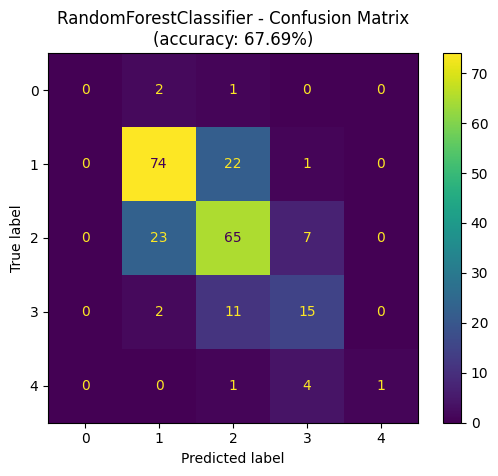

In [63]:
# Calculate the confusion matrix by passing the true y lables, and the predicted y lables
cm = confusion_matrix(y_test, y_pred)

# Use the ConfusionMatrixDisplay from skelearn to get a quick and easy graph
ConfusionMatrixDisplay(cm).plot()
plt.title(f'RandomForestClassifier - Confusion Matrix\n(accuracy: {accuracy:.2%})')
plt.show()

In [64]:
y_test.value_counts()

quality
5    97
6    95
7    28
8     6
4     3
Name: count, dtype: int64

In [65]:
pd.Series(y_pred).value_counts()

5    101
6    100
7     27
8      1
Name: count, dtype: int64

In [66]:
y.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

### Recommendation
- The warnings about your data warranted looking at the complete dataset. RandomForestClassifier can't determine when or if the lowest data samples "3, 8, and 4" even exists in this case it didn't predict 3 or 4 at all with 1 time getting an 8. The sample sets for these compared to the rest is very low which is an issue. Try using class_weight parameter="balanced" in your RandomForestClassifier to help balance the weights and have the classifier try to guess the lower numbers more often.
- Even better if you can scrap this model, try using LogisticIT for ordinal data like quality ranks

In [70]:
# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.7117903930131004
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.75      0.78      0.77        97
           6       0.69      0.73      0.71        95
           7       0.63      0.61      0.62        28
           8       1.00      0.17      0.29         6

    accuracy                           0.71       229
   macro avg       0.61      0.46      0.48       229
weighted avg       0.71      0.71      0.70       229



c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted

In [ ]:
# Initialize and train a RandomForestRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from mord import LogisticIT


# # model = RandomForestRegressor(random_state=42)
# model = LogisticIT()
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Round and clip predictions to our range of data 
# y_pred_rounded = y_pred.round().clip(3, 8).astype(int)

# #Evaluate margin of errors
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print("MAE:", mae)
# print("RMSE:", rmse)
# print("R²:", r2)


# Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

# print(classification_report(y_test, y_pred))

MAE: 0.4017467248908297
RMSE: 0.6541770389223969
R²: 0.31787234042553203
Accuracy: 0.611353711790393
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.68      0.79      0.73        97
           6       0.57      0.60      0.58        95
           7       0.40      0.21      0.28        28
           8       0.00      0.00      0.00         6

    accuracy                           0.61       229
   macro avg       0.33      0.32      0.32       229
weighted avg       0.57      0.61      0.59       229



c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gahhh\source\fullstack-projects\fullstack-projects\capstoneProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted

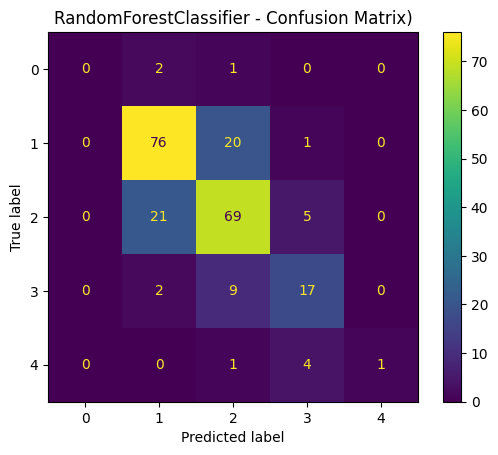

In [71]:
# Calculate the confusion matrix by passing the true y lables, and the predicted y lables
cm = confusion_matrix(y_test, y_pred)

# Use the ConfusionMatrixDisplay from skelearn to get a quick and easy graph
ConfusionMatrixDisplay(cm).plot()
plt.title(f'RandomForestClassifier - Confusion Matrix)')
plt.show()

## Multiclass Classifier Questions
1. Summarize the steps I took to create this multiclass classifier

   - Seperate the features from the target, 
   - Scale the features variable
   - Train test split features and target
   - Initialize, train and predict with our classifier
   - Plot our confusion matrix
2. Interpret the Confusion Matrix and Classification Report -> confusion matrix is showing on the x axis our predicted values and y axis is our actual. The annotated numbers in the blocks are how many we predicted and where (the y axis). So, if you go x axis label and go up for every y axis label that number shows what the amount the model guessed for that x value. Looking at the y value tells us what it actually is, so if x is 1 and we go up to y is 1 thats our True Positive we want these to be as high as possible.

3. How could we improve this model? Be specific.

   - use class_weight parameter = balanced
   - 
   -
4. What other models might be good to solve this problem? -> LogisticIT
5. What are the potential downsides of solving this as a classification problem? -> Classification treats the numbers as unordered categories, it doesn't understand this is a ranked quality and doesn't care the order they are in. 
6. What are the benefits of solving this as a classification problem? -> This could be good for unbiased predictions even if there are some labels that wont even show up
   

# 3. Binary Classification - Cure The Princess
## https://www.kaggle.com/datasets/unmoved/cure-the-princess

In [ ]:
df_Quest = pd.read_csv('Cure_the_princess.csv')
df_Quest

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8,0
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4,1
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2,1
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1,1


In [ ]:
# Envoke the describe command on the dataset
df_Quest.describe()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,15.365697,10.946749,16.115654,13.627973,15.069504,14.157271,12.328914,14.911206,16.871685,14.890590,10.916125,15.371600,12.084003,0.496578
std,8.669969,7.225162,8.372518,7.545244,8.349340,7.831476,7.709753,8.132678,9.579027,8.014197,7.045195,8.559139,8.047540,0.500095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.500000,5.300000,9.600000,7.600000,8.625000,7.900000,6.325000,8.400000,8.900000,8.800000,5.200000,8.800000,5.600000,0.000000
50%,14.700000,9.500000,15.800000,13.100000,14.500000,13.500000,11.200000,14.400000,16.300000,14.400000,9.700000,14.800000,10.500000,0.000000
75%,21.300000,15.575000,22.000000,19.000000,20.700000,19.500000,16.900000,20.500000,24.000000,20.400000,15.375000,21.100000,17.275000,1.000000
max,42.100000,34.100000,40.800000,35.800000,40.400000,37.800000,37.300000,39.400000,44.800000,39.500000,33.700000,42.000000,37.800000,1.000000


In [ ]:
df_Quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phoenix Feather  2338 non-null   float64
 1   Unicorn Horn     2338 non-null   float64
 2   Dragon's Blood   2338 non-null   float64
 3   Mermaid Tears    2338 non-null   float64
 4   Fairy Dust       2338 non-null   float64
 5   Goblin Toes      2338 non-null   float64
 6   Witch's Brew     2338 non-null   float64
 7   Griffin Claw     2338 non-null   float64
 8   Troll Hair       2338 non-null   float64
 9   Kraken Ink       2338 non-null   float64
 10  Minotaur Horn    2338 non-null   float64
 11  Basilisk Scale   2338 non-null   float64
 12  Chimera Fang     2338 non-null   float64
 13  Cured            2338 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 255.8 KB


In [ ]:
# Plot the values from the .corr() command on a heat map
numerical_features = df_Quest.select_dtypes(include=['float64', 'int64']).columns.to_list()

corr = df_Quest[[
    *numerical_features
]].corr(method='spearman')

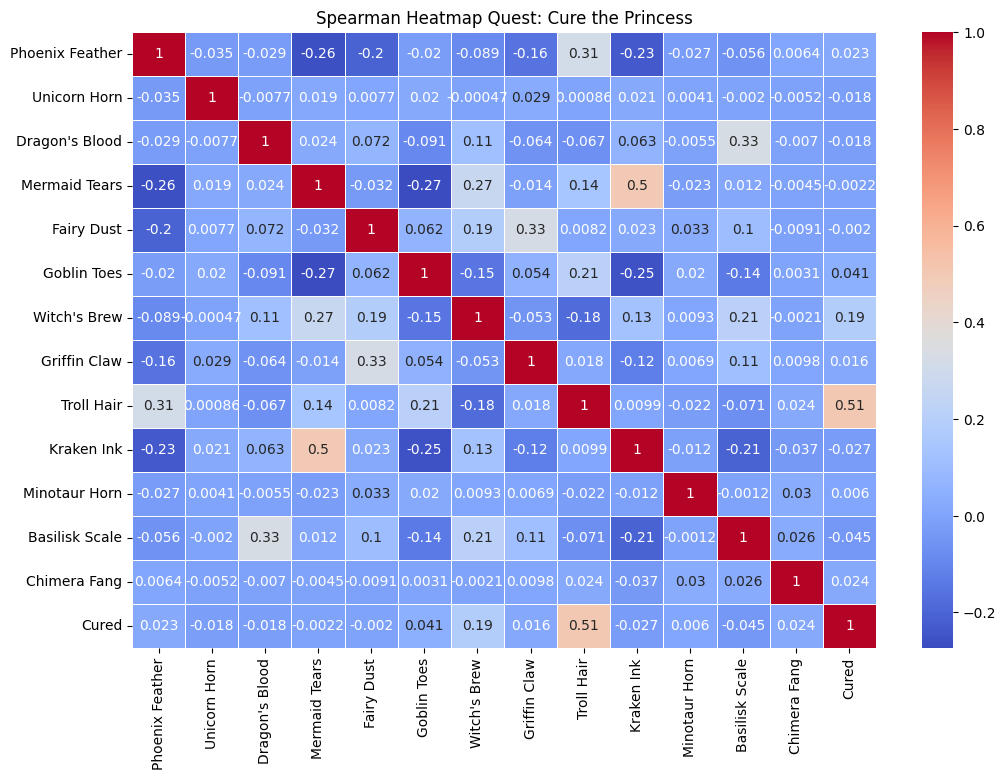

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Heatmap Quest: Cure the Princess')

plt.show()

Mermaid Tears is the biggest feature or ingredient for kraken ink and Troll Hair is the biggest feature for a cure.

In [ ]:
# Seperate your ingredients (features) from the outcome (target)
X = df_Quest.drop('Cured', axis=1)
X

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1


In [ ]:
# Seperate out Cured (target)
y = df_Quest.Cured
y

0       0
1       0
2       1
3       1
4       0
       ..
2333    0
2334    1
2335    1
2336    1
2337    1
Name: Cured, Length: 2338, dtype: int64

In [ ]:
# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Initalize the MinMaxScaler with feature_range=(-1, 1)
mm_scaler = MinMaxScaler(feature_range=(-1, 1))

# Transform the Ingridents (X) using the MinMaxScaler
X = mm_scaler.fit_transform(X)
X = pd.DataFrame(data=X, columns=df_Quest.drop(columns=['Cured']).columns)
X

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang
0,-0.931873,0.069486,-0.125628,0.545977,-0.649746,-0.532609,-0.046832,-0.364583,-0.931507,0.298701,-0.418960,0.229268,-0.375000
1,-0.946472,-0.697885,-0.296482,-0.293103,-0.258883,-0.342391,-0.449036,-0.791667,-0.716895,0.298701,-0.969419,-0.400000,-0.717391
2,-0.211679,-0.220544,0.145729,-0.666667,-0.507614,-0.195652,0.013774,-0.911458,-0.342466,0.049351,-0.382263,-0.239024,-0.434783
3,-0.639903,-0.474320,-0.708543,0.488506,-0.817259,0.527174,-0.250689,-0.026042,-0.223744,0.028571,-0.229358,-0.370732,-0.614130
4,0.026764,-0.407855,-0.226131,-0.454023,0.065990,0.217391,-0.911846,-0.104167,0.041096,-0.464935,-0.724771,-0.229268,-0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,-0.591241,-0.927492,-0.256281,-0.718391,0.456853,-0.038043,-0.421488,-0.369792,-0.347032,0.116883,-0.443425,-0.819512,-0.304348
2334,-0.459854,-0.601208,-0.015075,-0.752874,-0.091371,-0.016304,-0.537190,-0.432292,-0.050228,-0.428571,0.571865,-0.639024,0.271739
2335,-0.309002,0.945619,-0.688442,-0.224138,-0.238579,-0.146739,-0.988981,0.640625,0.529680,0.293506,-0.822630,-0.170732,-0.010870
2336,-0.951338,-0.033233,0.618090,-0.298851,0.426396,0.875000,0.030303,0.526042,0.356164,-0.828571,-0.100917,-0.048780,-0.940217


In [ ]:
# Seperate the training and testing data using the train_test_split function
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# print the shape of your datasets
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',Y_train.shape)
print('Shape of y_test: ',Y_test.shape)

Shape of X_train:  (1870, 13)
Shape of X_test:  (468, 13)
Shape of y_train:  (1870,)
Shape of y_test:  (468,)


In [ ]:
# Import Statements
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, RocCurveDisplay

# Initialize and train a LogisticRegressior
model = LogisticRegression(max_iter=1000, random_state=82)
new_X = model.fit(X_train, Y_train)

# Make class predictions 
Y_prediction = model.predict(X_test)

# Make probability predicitons, named y_proba
y_proba = model.predict_proba(X_test)

# Evaluate accuracy using the accuracy_score function from sklearn
print(f'Accuracy: {accuracy_score(Y_test, Y_prediction)}')

# print the classification_report for your logistic regressor
print(classification_report(Y_test, Y_prediction))

Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       231
           1       0.90      0.90      0.90       237

    accuracy                           0.90       468
   macro avg       0.90      0.90      0.90       468
weighted avg       0.90      0.90      0.90       468



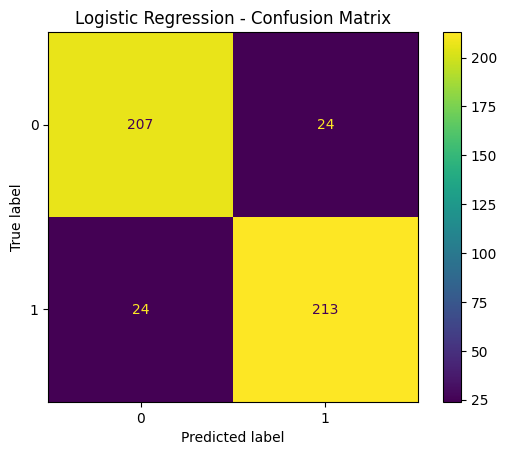

In [ ]:
# Create a confusion matrix using the confusion_matrix function, and save it to a variable named cm
cm = confusion_matrix(Y_test, Y_prediction)

# Using ConfusionMatrixDisplay pass your variable named cm that you just created
ConfusionMatrixDisplay(cm).plot()
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

In [ ]:
# use the (receiver operating characteristic) roc_curve function to calculate the falsepositive_rate, truepositive_rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_proba[:, 1])

# use the roc_auc_score to calculate the Area Under the Curve (AUC)
auc = roc_auc_score(Y_test, y_proba[:, 1])

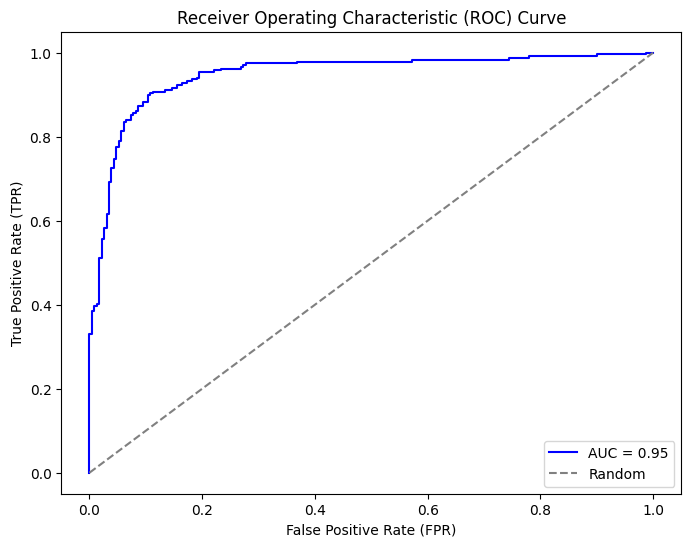

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
thresholds

array([       inf, 0.99952842, 0.93818059, 0.93701211, 0.90533832,
       0.90489539, 0.90123864, 0.89939973, 0.89891617, 0.89858585,
       0.85779217, 0.8577595 , 0.84030584, 0.83384114, 0.81936698,
       0.81893727, 0.80732798, 0.80657975, 0.75823121, 0.7545897 ,
       0.72592694, 0.72263301, 0.69992199, 0.69327219, 0.67668317,
       0.6739787 , 0.66126939, 0.66040776, 0.63446797, 0.63312133,
       0.59544408, 0.5885451 , 0.58420961, 0.58061615, 0.56250493,
       0.56081756, 0.55933762, 0.55819296, 0.55504672, 0.55291715,
       0.5430124 , 0.53225574, 0.52955394, 0.51649808, 0.50118919,
       0.49603354, 0.48671607, 0.45159919, 0.44907942, 0.4299257 ,
       0.42491031, 0.40605652, 0.40574509, 0.39266738, 0.38841871,
       0.37103434, 0.35883306, 0.348616  , 0.34349817, 0.33980453,
       0.33547813, 0.33086166, 0.3286155 , 0.31776361, 0.30722289,
       0.29073476, 0.28852352, 0.28314683, 0.28225225, 0.25616434,
       0.25388625, 0.25313611, 0.24600886, 0.24434222, 0.23977

In [ ]:
# F1-optimized threshold
from sklearn.model_selection import TunedThresholdClassifierCV


f1_tuned_model = TunedThresholdClassifierCV(
    estimator=model,
    scoring='f1',
    cv=10,
    random_state=82
)
f1_tuned_model.fit(X_train, Y_train)

f1_prediction = f1_tuned_model.predict(X_test)

print(f'Best threshold: {f1_tuned_model.best_threshold_}')

Best threshold: 0.44433622002708256


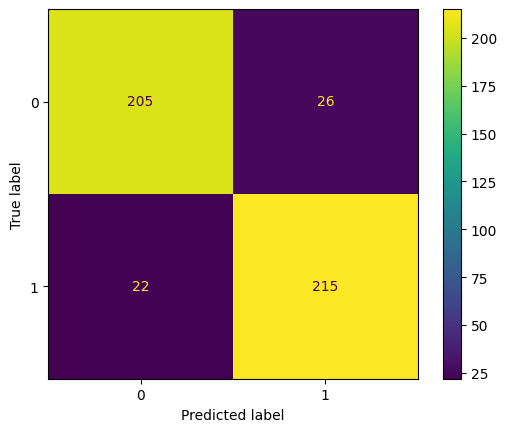

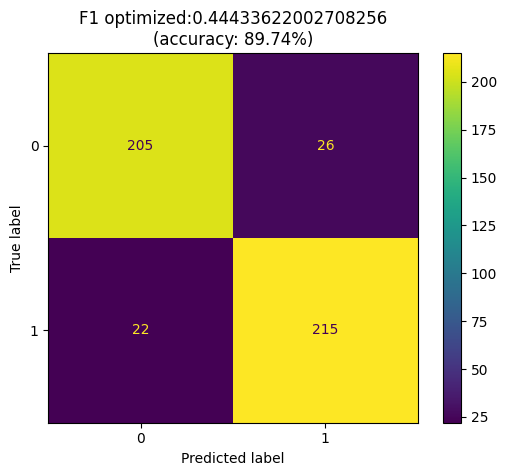

In [ ]:
#Plot optimized threshold
acc = accuracy_score(Y_test, f1_prediction)

ConfusionMatrixDisplay.from_predictions(Y_test, f1_prediction).plot()
plt.title(f'F1 optimized:{f1_tuned_model.best_threshold_}\n(accuracy: {acc:.2%})')
plt.show()

In [ ]:
Y_test.value_counts()

Cured
1    237
0    231
Name: count, dtype: int64

In [ ]:
pd.Series(f1_prediction).value_counts()

1    241
0    227
Name: count, dtype: int64

In [ ]:
y.value_counts()

Cured
0    1177
1    1161
Name: count, dtype: int64

### Cure the Princess
1. What ingredients should you use? -> Troll Hair
2. How can you be certain that these are the correct ingredients? -> highest correlation to the cure ingredient at .51 correlation 
3. Can you determine the **exact ratio** of ingredients that maximizes the princess' survival? -> .44433?
4. Should attempt to convience the king that you know to cure the princess, or should you conduct more experiments? -> conduct more
5. *Assuming* that you are ready to cure the princess, convince the king.